## BCIS5110 

we start to work on Kiva datasets.

In [1]:
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


1. Read in the three tables (the original dataset you downloaded, not the sample I provided for your initial report.)

In [4]:
loan = pd.read_csv ('./kiva/loans.csv')


In [4]:
lenders = pd.read_csv ('./kiva/lenders.csv')
loanlen =  pd.read_csv ('./kiva/loans_lenders.csv')

2. Display the information about each dataframe.

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185241 entries, 0 to 2185240
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

In [5]:
lenders.info()

NameError: name 'lenders' is not defined

In [7]:
loanlen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131078 entries, 0 to 2131077
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   LOAN_ID  int64 
 1   LENDERS  object
dtypes: int64(1), object(1)
memory usage: 32.5+ MB



3. Check for missing values of the loans dataframe. You can use sum() to find out the number of missing values.

In [6]:
loan.isnull().sum()

LOAN_ID                                  0
LOAN_NAME                            50387
ORIGINAL_LANGUAGE                    46038
DESCRIPTION                          46267
DESCRIPTION_TRANSLATED              455653
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             46038
VIDEO_ID                           2184021
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             46061
COUNTRY_CODE                            36
COUNTRY_NAME                             0
TOWN_NAME                           179002
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     526965
CURRENCY                                 0
PARTNER_ID                               0
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4276
RAISED_TIME

4. First, we check the dependent variable 'STATUS' in the loans dataframe. How many unique values?

In [7]:
loan['STATUS'].unique()

array(['funded', 'expired', 'fundRaising', 'refunded'], dtype=object)

5. How many observations for each category of 'STATUS'? (Which function we have learned can do that?)

In [8]:
loan['STATUS'].value_counts()

funded         2076778
expired          93419
refunded          9327
fundRaising       5717
Name: STATUS, dtype: int64

6. Our purpose is to build a model that predicts whether a loan can get funded based on loan features. So, which suggests the loan is funded? Which not? Which should we ignore?<br>
1) Delete the records with the category we can ignore.<br>
2) Recode the three categories to two categories (funded, notfunded)<br>
The recoded variable will be our target variable.

In [9]:
loan.drop(index = loan[loan['STATUS'] == 'fundRaising'].index, inplace = True)
loan.head()
loan['STATUS'].replace('expired', 'notfunded', inplace = True)
loan['STATUS'].replace('refunded', 'notfunded', inplace = True)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1057058,\tLucy,English,Lucy is a married woman and has been blessed w...,Lucy is a married woman and has been blessed w...,300.0,300.0,funded,2157387.0,NaN,...,14.0,11,1,1,"#Fabrics, #Parent, #Woman-Owned Business, #Sch...",\tLucy,female,true,monthly,field_partner
1,509472,Madosho,English,Madosho is a very responsible man who values h...,NaN,300.0,300.0,funded,942435.0,NaN,...,14.0,6,3,2,NaN,Madosho,male,true,monthly,field_partner
2,344324,Marcelina,English,Marcelina is married with 2 child. She is a ve...,NaN,475.0,475.0,funded,886916.0,NaN,...,13.0,13,2,1,NaN,Marcelina,female,true,monthly,field_partner
3,768521,Fadzisai,English,Fadzisai is a 30-year-old businesswoman from t...,Fadzisai is a 30-year-old businesswoman from t...,500.0,500.0,funded,1692199.0,NaN,...,8.0,20,2,1,user_favorite,Fadzisai,female,true,monthly,field_partner
4,90984,Luisa,Spanish,"Luisa tiene 49 años, vive con su esposo en su ...",Luisa is 49 years old and lives with her husba...,925.0,925.0,funded,276468.0,NaN,...,11.0,29,4,2,NaN,Luisa,female,true,bullet,field_partner


In [10]:
loan['STATUS'].value_counts()

funded       2076778
notfunded     102746
Name: STATUS, dtype: int64

7. Examine the variable 'LOAN_AMOUNT'. <br>
1) Check the distribution. What is the value of outliers if we use 3*IQR to define? <br>
2) Remove the outliers. <br>
3) Create a new variable by taking log of this variable.

In [11]:
loan[['LOAN_AMOUNT']].describe()
loan['LOAN_AMOUNT'].quantile(0.25)
loan['LOAN_AMOUNT'].quantile(0.75)
Q1 = loan['LOAN_AMOUNT'].quantile(0.25)
Q3 = loan['LOAN_AMOUNT'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR


,LOAN_AMOUNT
count,2.179524e+06
mean,8.112930e+02
std,1.671390e+03
min,2.500000e+01
25%,2.750000e+02
50%,5.000000e+02
75%,9.500000e+02
max,5.000000e+05


275.0

950.0

In [12]:
outliers_15_low = (loan['LOAN_AMOUNT'] < lower_limit)
outliers_15_up = (loan['LOAN_AMOUNT'] > upper_limit)
loan['LOAN_AMOUNT'][(outliers_15_low | outliers_15_up)]
loan['LOAN_AMOUNT'][~(outliers_15_low | outliers_15_up)]
loan = loan[~(outliers_15_low | outliers_15_up)]
loan['logAMount'] = np.log(loan['LOAN_AMOUNT'])

20         3275.0
41         3450.0
62         3000.0
71         3225.0
96         3000.0
            ...  
2185119    5000.0
2185194    5000.0
2185217    4575.0
2185219    4100.0
2185237    5000.0
Name: LOAN_AMOUNT, Length: 88745, dtype: float64

0          300.0
1          300.0
2          475.0
3          500.0
4          925.0
           ...  
2185235    350.0
2185236    600.0
2185238    250.0
2185239    300.0
2185240    450.0
Name: LOAN_AMOUNT, Length: 2090779, dtype: float64

In [13]:
loan['logAMount'].head()

0    5.703782
1    5.703782
2    6.163315
3    6.214608
4    6.829794
Name: logAMount, dtype: float64

8. Observe the missing value results from Q3. What is the outcome for variables 'COUNTRY_CODE' and 'COUNTRY_NAME'. What would you do? Do it.

In [14]:
loan['COUNTRY_CODE'].isnull().sum()

1

In [15]:
loan['COUNTRY_NAME'].isnull().sum()

0

In [16]:
loan.drop(columns = 'COUNTRY_CODE',inplace = True)

9. Find the number of missing values in variables 'IMAGE_ID', 'VIDEO_ID' and 'LOAN_USE'. What would you do? Do it.

In [17]:
loan['IMAGE_ID'].isnull().sum()

44295

In [18]:
loan['VIDEO_ID'].isnull().sum()

2090323

In [19]:
loan['LOAN_USE'].isnull().sum()

44312

In [20]:
loan.drop(columns = 'LOAN_USE', inplace = True)
loan.drop(columns = 'VIDEO_ID', inplace = True)
loan.isnull().sum()

LOAN_ID                                 0
LOAN_NAME                           48352
ORIGINAL_LANGUAGE                   44295
DESCRIPTION                         44367
DESCRIPTION_TRANSLATED             442266
FUNDED_AMOUNT                           0
LOAN_AMOUNT                             0
STATUS                                  0
IMAGE_ID                            44295
ACTIVITY_NAME                           0
SECTOR_NAME                             0
COUNTRY_NAME                            0
TOWN_NAME                          163565
CURRENCY_POLICY                         0
CURRENCY_EXCHANGE_COVERAGE_RATE    495274
CURRENCY                                0
PARTNER_ID                              0
POSTED_TIME                             0
PLANNED_EXPIRATION_TIME            362341
DISBURSE_TIME                        1583
RAISED_TIME                         87152
LENDER_TERM                            24
NUM_LENDERS_TOTAL                       0
NUM_JOURNAL_ENTRIES               

In [20]:
loan['IMAGE_ID'] = loan['IMAGE_ID'].apply(lambda x: 1 if x > 0 else 0)

10. Create a new variable 'TIME_LENGTH' that is the difference between 'POSTED_TIME' and 'RAISED_TIME'.

In [36]:

loan['TIME_LENGTH'] = pd.to_datetime(loan['POSTED_TIME']) - pd.to_datetime(loan['RAISED_TIME']) 


In [37]:
loan[['TIME_LENGTH']].head()

,TIME_LENGTH
0,-6 days +02:04:45
1,-2 days +16:05:25
2,-23 days +05:45:33
3,-3 days +18:53:14
4,-3 days +17:08:27


11. Find the different between 'POSTED_TIME' and 'DISBURSE_TIME'. Create a new variable 'PREDISBURSE' if the 'DISBURSE_TIME' is before 'POSTED_TIME'.

In [38]:
loan['POSTED_TIME'] = pd.to_datetime(loan['POSTED_TIME'])
loan['DISBURSE_TIME'] = pd.to_datetime(loan['DISBURSE_TIME'])


loan['DIFFERENCE'] = loan['DISBURSE_TIME'] < loan['POSTED_TIME']

In [39]:
loan ['PREDISBURSE'] =np.where(loan['DIFFERENCE'] == False, 0,1)
loan ['PREDISBURSE'].value_counts()
loan ['PREDISBURSE'].unique()

1    1924121
0     166658
Name: PREDISBURSE, dtype: int64

array([1, 0])

12. Exame variable 'CURRENCY_EXCHANGE_COVERAGE_RATE'. How many unique values for this variable? How many missing?<br>
Before we rush to replace missing values with mode, we ask the question: is the missing value actually missing or is it something else? We then read the policies on Kiva about exchange coverage. For instance, a lender gives 25 in US dollars and it changes to 250 in another currency. But when the money is repaid at 250 in the other currency, it only exchanges to 20 US dollars. The CURRENCY_EXCHANGE_COVERAGE_RATE measures how much such loss will be covered by the field partners. Some would cover 10% or 20%. So, it is more likely that the missing values indicating the loan does not have any coverage. So, it's more likely means 0.<br>
Replace the missing value with 0.

In [40]:

print(len(loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].unique()))
print(loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].unique())
print(loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].isnull().sum())

4
[0.1 0.2 '0' 0.0]
0


In [41]:
loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].fillna('0', inplace = True)

In [42]:
loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].head()

0    0.1
1    0.1
2    0.2
3    0.1
4      0
Name: CURRENCY_EXCHANGE_COVERAGE_RATE, dtype: object

### Assignment 10&11 starts here.
Q13-26 6 points each; Q27: 10 points; Extra question: 10 points.

13. Take a look at the data after we have done the 12 steps above. We will continue the preparation. 
Check the unique values of 'ACTIVITY_NAME' and 'SECTOR_NAME'. You may notice that there are many more activities than sectors and Sector is higher-level categorization of loans. We can choose one of them. To keep the results easier to read. We can keep sector name.
'LOAN_NAME' seems irrelevant to whether a loan is funded. We have not learned how to process 'DESCRIPTION' and 'DESCRIPTION_TRANSLATED'. 'FUNDED_AMOUNT' is the amount that actually raised at the end. Most times it is the same as 'LOAN_AMOUNT'.  After doing similar analysis with every variable, we decide to keep only the following variables in the final analysis: <br>
LOAN_ID<br>
ORIGINAL_LANGUAGE<br>
LOAN_AMOUNT (and the logAmount variable we created)<br>
STATUS<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
POSTED_TIME  (and the TIME_LENGTH we created)<br>
DISBURSE_TIME (and the PREDISBURSE we created)<br>
RAISED_TIME                        
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL 

In [43]:
loan['ACTIVITY_NAME'].unique()
loan['SECTOR_NAME'].unique()

array(['Fish Selling', 'General Store', 'Motorcycle Repair',
       'Food Production/Sales', 'Bricks', 'Retail', 'Knitting', 'Farming',
       'Personal Housing Expenses', 'Food Stall', 'Home Appliances',
       'Pigs', 'Clothing Sales', 'Grocery Store', 'Beverages',
       'Farm Supplies', 'Personal Expenses', 'Fruits & Vegetables',
       'Food Market', 'Liquor Store / Off-License', 'Charcoal Sales',
       'Bakery', 'Manufacturing', 'Primary/secondary school costs',
       'Taxi', 'Cattle', 'Higher education costs', 'Fishing',
       'Animal Sales', 'Livestock', 'Cereals', 'Motorcycle Transport',
       'Sewing', 'Clothing', 'Internet Cafe', 'Poultry',
       'Personal Products Sales', 'Beauty Salon', 'Education provider',
       'Furniture Making', 'Used Clothing', 'Agriculture',
       'Fuel/Firewood', 'Food', 'Shoe Sales', 'Home Products Sales',
       'Consumer Goods', 'Computers', 'Office Supplies', 'Rickshaw',
       'Vehicle', 'Tailoring', 'Transportation',
       'Personal M

array(['Food', 'Retail', 'Services', 'Construction', 'Arts',
       'Agriculture', 'Housing', 'Personal Use', 'Clothing',
       'Manufacturing', 'Education', 'Transportation', 'Health',
       'Wholesale', 'Entertainment'], dtype=object)

Create a copy of the dataset that only contains the variables listed above. You may use the list of variable names to slice the dataframe we have from Step 12 in Assignment 8&9.

In [44]:
newLoans= loan[['LOAN_ID',
'ORIGINAL_LANGUAGE',
'LOAN_AMOUNT', 'logAMount',
'IMAGE_ID',
'SECTOR_NAME',
'COUNTRY_NAME',
'CURRENCY_POLICY',
'CURRENCY_EXCHANGE_COVERAGE_RATE',
'POSTED_TIME', 'TIME_LENGTH',
'DISBURSE_TIME', 'PREDISBURSE',
'RAISED_TIME',
'LENDER_TERM',
'NUM_JOURNAL_ENTRIES',
'NUM_BULK_ENTRIES',
'REPAYMENT_INTERVAL',
'DISTRIBUTION_MODEL', 'STATUS']]

In [52]:
newLoans.isnull().sum()

LOAN_ID                                0
ORIGINAL_LANGUAGE                  44295
LOAN_AMOUNT                            0
logAMount                              0
IMAGE_ID                               0
SECTOR_NAME                            0
COUNTRY_NAME                           0
CURRENCY_POLICY                        0
CURRENCY_EXCHANGE_COVERAGE_RATE        0
POSTED_TIME                            0
TIME_LENGTH                        87152
DISBURSE_TIME                       1583
PREDISBURSE                            0
RAISED_TIME                        87152
LENDER_TERM                           24
NUM_JOURNAL_ENTRIES                    0
NUM_BULK_ENTRIES                       0
REPAYMENT_INTERVAL                     0
DISTRIBUTION_MODEL                     0
STATUS                                 0
Year                                   0
dtype: int64

14. Next we start to explore the data. You need to import matplotlib. First, make two histograms for 'LOAN_AMOUNT' and 'logAMount'. How are they different?

In [53]:
import matplotlib.pyplot as plt


(array([686105., 627837., 294390., 240225.,  78294.,  64098.,  40441.,
         22335.,  21220.,  15834.]),
 array([  25.,  320.,  615.,  910., 1205., 1500., 1795., 2090., 2385.,
        2680., 2975.]),
 <BarContainer object of 10 artists>)

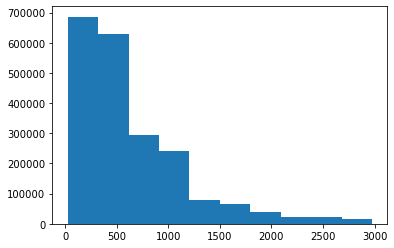

In [54]:
plt.hist(newLoans['LOAN_AMOUNT'])
plt.show()

(array([  1910.,   9330.,  65813., 135363., 324124., 438481., 458969.,
        365384., 197221.,  94184.]),
 array([3.21887582, 3.69678817, 4.17470052, 4.65261287, 5.13052522,
        5.60843757, 6.08634992, 6.56426227, 7.04217462, 7.52008697,
        7.99799932]),
 <BarContainer object of 10 artists>)

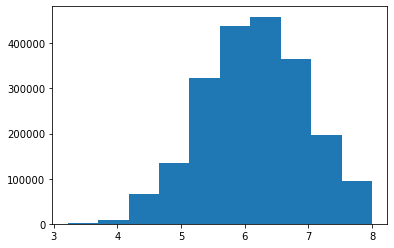

In [55]:
plt.hist(newLoans['logAMount'])
plt.show()

15. What is the total loan amount in each sector? Create a bar chart to demonstrate.

<AxesSubplot:xlabel='SECTOR_NAME'>

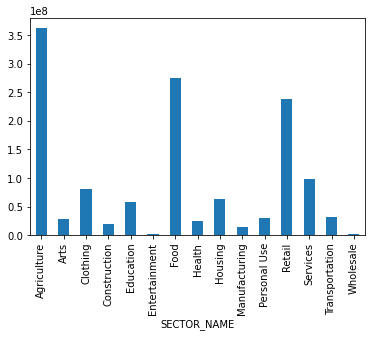

In [56]:
amountSector = newLoans.groupby('SECTOR_NAME')['LOAN_AMOUNT'].sum()
amountSector.plot(kind = 'bar')

16. What is the total number of loans in each country? Create a bar chart to demonstrate.

<AxesSubplot:xlabel='COUNTRY_NAME'>

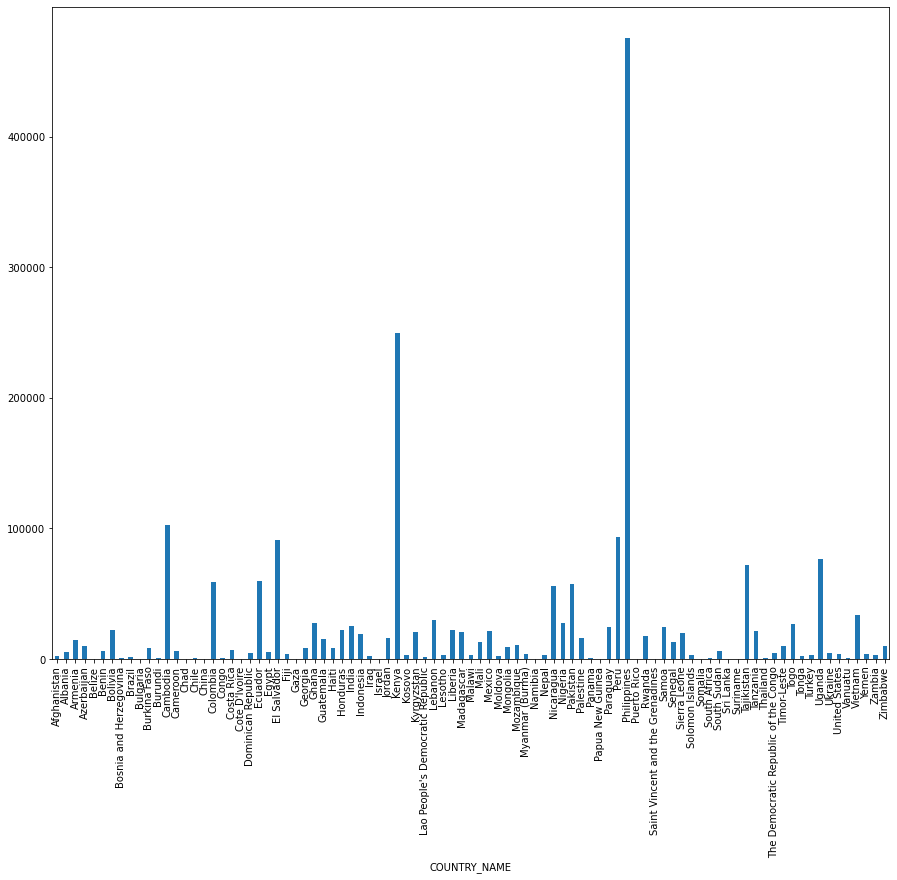

In [57]:
countryLoans = newLoans.groupby('COUNTRY_NAME')['LOAN_ID'].count()
countryLoans.plot(kind = 'bar', figsize = (15,12))

17. Change the POSTED_TIME to DateTimeIndex and create a new variable 'Year' using the year of POSTED_TIME. What is the total number of loans in each year? Create a line graph to demonstrate.

In [58]:
newLoans['Year'] = pd.DatetimeIndex(newLoans['POSTED_TIME']).year

<ipython-input-58-2ca8fc3f6a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newLoans['Year'] = pd.DatetimeIndex(newLoans['POSTED_TIME']).year


<AxesSubplot:xlabel='Year'>

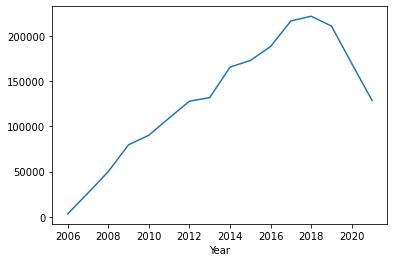

In [38]:
amountYear = newLoans.groupby('Year')['LOAN_ID'].count()
amountYear.plot()

18. Create a pivot table to show the average loan amount in each sector each year.

In [39]:
newLoans.pivot_table('LOAN_AMOUNT',index='SECTOR_NAME',columns = 'Year')

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
SECTOR_NAME,,,,,,,,,,,,,,,,
Agriculture,677.455919,657.880235,684.617722,623.594413,678.098313,721.580157,764.921505,784.610301,710.890633,692.998049,654.891644,634.365077,638.312252,641.168366,533.840443,513.903631
Arts,765.441176,556.600877,594.340278,602.074167,737.452420,745.825751,822.846524,708.797554,726.123110,673.768835,639.175187,568.633703,605.140598,723.251998,780.572560,799.155786
Clothing,622.483221,646.504950,682.180233,708.049691,810.285639,812.513982,806.195974,779.448352,727.256545,765.992578,773.964771,751.634396,707.910490,746.540881,683.967112,675.896511
Construction,784.405941,730.501618,723.112892,725.808538,751.904880,808.087460,816.363636,832.622774,798.184912,795.549417,831.099935,753.264418,755.033784,837.999460,826.621297,836.826698
Education,NaN,794.642857,725.274725,666.281139,674.962121,751.921182,860.717309,857.643714,797.358823,878.200633,834.667050,846.851251,800.955204,778.835596,660.697207,353.612646
Entertainment,603.571429,531.250000,681.770833,681.500000,636.285714,801.954733,762.500000,812.931034,859.566327,863.425926,883.210784,987.008734,879.015544,881.250000,890.476190,807.692308
Food,647.490157,595.012937,645.766043,594.631202,647.141493,642.240619,648.798015,643.258057,641.785714,610.653760,615.656124,591.633768,586.867919,614.770576,530.509988,531.230650
Health,809.722222,714.716312,768.494624,717.414530,764.544808,766.472393,789.650229,912.354167,950.224359,856.627517,832.403759,823.549853,853.683460,823.819041,695.913819,686.162894
Housing,497.619048,787.557078,631.327160,608.928571,631.899763,744.884707,850.195122,859.677858,661.019399,751.556973,623.098599,534.126626,574.562354,355.497300,510.843721,467.710145


19. Get the number of days in the TIME_LENGTH variable we created and create a new variable 'Days'using it. Create a scatterplot of 'LOAN_AMOUNT' and 'Days'. What's your observation?

<ipython-input-59-3ceb5c998fa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newLoans['Days'] = newLoans['TIME_LENGTH'].dt.days


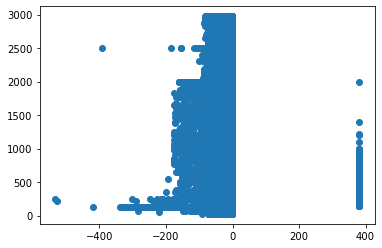

In [59]:
newLoans['Days'] = newLoans['TIME_LENGTH'].dt.days
plt.scatter(x=newLoans['Days'], y=newLoans['LOAN_AMOUNT'])

20. Create a scatterplot of 'LOAN_AMOUNT' and 'LENDER_TERM'. What's your observation?

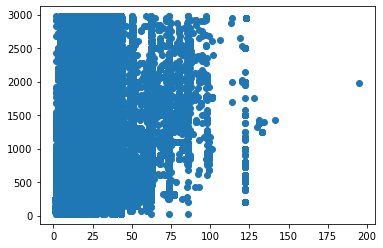

In [41]:
plt.scatter(x=newLoans['LENDER_TERM'], y=newLoans['LOAN_AMOUNT'])

21. Prepare the data for model analysis. The target variable is 'STATUS'. The predictor variables we want to include:<br>
ORIGINAL_LANGUAGE<br>
the logAmount variable we created<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
Days we creatd based on the TIME_LENGTH <br>
PREDISBURSE we created<br>
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL<br>
Now we can drop all records with missing values at this point.

In [60]:
target = newLoans['STATUS']
y = target
features = ['ORIGINAL_LANGUAGE',
 'logAMount',
'IMAGE_ID',
'SECTOR_NAME',
'COUNTRY_NAME',
'CURRENCY_POLICY',
'CURRENCY_EXCHANGE_COVERAGE_RATE',
'Days',
'PREDISBURSE',
'LENDER_TERM',
'NUM_JOURNAL_ENTRIES',
'NUM_BULK_ENTRIES',
'REPAYMENT_INTERVAL',
'DISTRIBUTION_MODEL']

X = newLoans[features]

In [61]:
newLoans.dropna(inplace = True)

<ipython-input-61-713fd8a42d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newLoans.dropna(inplace = True)


In [62]:
newLoans.isnull().sum()

LOAN_ID                            0
ORIGINAL_LANGUAGE                  0
LOAN_AMOUNT                        0
logAMount                          0
IMAGE_ID                           0
SECTOR_NAME                        0
COUNTRY_NAME                       0
CURRENCY_POLICY                    0
CURRENCY_EXCHANGE_COVERAGE_RATE    0
POSTED_TIME                        0
TIME_LENGTH                        0
DISBURSE_TIME                      0
PREDISBURSE                        0
RAISED_TIME                        0
LENDER_TERM                        0
NUM_JOURNAL_ENTRIES                0
NUM_BULK_ENTRIES                   0
REPAYMENT_INTERVAL                 0
DISTRIBUTION_MODEL                 0
STATUS                             0
Year                               0
Days                               0
dtype: int64

22. Generate dummies for all categorical variables

In [73]:
X = pd.get_dummies(X, columns=['ORIGINAL_LANGUAGE', 'SECTOR_NAME', 'COUNTRY_NAME','CURRENCY_POLICY', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL'], drop_first = True)
X.head()

,logAMount,IMAGE_ID,CURRENCY_EXCHANGE_COVERAGE_RATE,Days,PREDISBURSE,LENDER_TERM,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,ORIGINAL_LANGUAGE_English,ORIGINAL_LANGUAGE_French,...,COUNTRY_NAME_United States,COUNTRY_NAME_Vanuatu,COUNTRY_NAME_Vietnam,COUNTRY_NAME_Yemen,COUNTRY_NAME_Zambia,COUNTRY_NAME_Zimbabwe,CURRENCY_POLICY_standard,REPAYMENT_INTERVAL_irregular,REPAYMENT_INTERVAL_monthly,DISTRIBUTION_MODEL_field_partner
0,5.703782,1,0.1,-6.0,1,14.0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1
1,5.703782,1,0.1,-2.0,1,14.0,3,2,1,0,...,0,0,0,0,0,0,0,0,1,1
2,6.163315,1,0.2,-23.0,1,13.0,2,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,6.214608,1,0.1,-3.0,0,8.0,2,1,1,0,...,0,0,0,0,0,1,0,0,1,1
4,6.829794,1,0,-3.0,1,11.0,4,2,0,0,...,0,0,0,0,0,0,1,0,0,1


23. Prepare training and test datasets

In [74]:
from sklearn.model_selection import train_test_split


In [75]:
X_train, X_test, y_train,y_test = train_test_split (X, y, test_size = 0.30, random_state = 0)


In [76]:
len(y_test)


627234

24. Fit a logistic regression model.

In [78]:
from sklearn.linear_model import LogisticRegression

In [83]:
regressor = LogisticRegression()

In [84]:
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

25. Get the predicted results for the test dataset

In [85]:
y_pred = regressor.predict (X_test)
y_pred
y_pred.shape

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

26. Evaluate the model using accuracy rate and confusion matrix.

In [86]:
from sklearn.metrics import accuracy_score
print ('accuracy'= accuracy_score( y_test, y_pred )*100

SyntaxError: unexpected EOF while parsing (<ipython-input-86-2a872991ab3d>, line 2)

In [87]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(yc_test, y_pred)

NameError: name 'yc_test' is not defined

27. Repeat Step 24-26 using another classification method. Which method has better results?

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
clf = DecisionTreeClassifier ()
clf = clf.fit(X_train , y_train)
y_pred2 = clf.predict (X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Extra question: In your initial project report, you have proposed several descriptive questions. Pick one to explore.

In [95]:
#WHAT  SECTOR   HAS THE MAXIMUM AND MINIMUM AMOUNT OF LOAN?
newLoans['SECTOR_NAME'].max()
newLoans['SECTOR_NAME'].min()


'Wholesale'

'Agriculture'